In [3]:
from input.init import model
from input.q_learner import Q_Learner
from input.sarsa import SARSA
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


In [4]:
convergence = 100000
n=2
k=1
m=15
sessions=1
# Hyperparameters
alpha = 0.1 # Change these to test Calvano results
beta =  0.00001 # Change these to test Calvano results
delta= 0.95
max_steps =2500000
# for alpha = 0.15 beta = 0.00001 its 1500000, 
# for alpha = 0.1 beta = 0.000005 its 2500000, 
# for alpha = 0.075 beta = 0.0000025 its 4000000,
#for alpha = 0.05 beta = 0.0000025 its 4000000
log_frequency = 10000
overwrite_id = 0

trainer_choice = 'QL'

if trainer_choice in ['QL', 'SARSA']:
    state_space = 'discrete'

# Savefile
savefile = state_space + '_' + trainer_choice
if trainer_choice in ['QL', 'SARSA']:
    savefile += '_alpha_' + str(alpha).replace('.', '_') + '_beta_' + str(beta).replace('.', '_')


In [5]:

game = model(
            n=n, 
            k=k, 
            m=m, 
            max_steps=max_steps, 
            sessions=sessions, 
            convergence=convergence, 
            savefile= savefile
        )

if trainer_choice == 'QL':
    trainer = Q_Learner(
        env=game, 
        n=n, 
        m=m, 
        alpha=alpha, 
        beta=beta, 
        delta=delta, 
        log_frequency=log_frequency,
        sessions =sessions
    )
elif trainer_choice == 'SARSA':
    trainer = SARSA(env=game, 
        n=n, 
        m=m, 
        alpha=alpha, 
        beta=beta, 
        delta=delta, 
        log_frequency=log_frequency,
        sessions= sessions
    )

## The model

The model is a mulitple time period version of the Bertrand competition.
There are $n = 2$ firms. Each firm has marginal cost $c_i=1$. Firms must simultaneously enter a price $p_{i,t}$, for firm $i$ in period $t$. The action space  is   the range of
$$
\left[p^N-\xi\left(p^M-p^N\right), p^M+\xi\left(p^M-p^N\right)\right],
$$
where the parameter $\xi>0$ can expand the range of the prices. Prices range from below Nash $p^N$ to above monopoly $p^M$. We separate this range into $m=15$ equally spaced prices.

Each firm a memory of length $k=1$. This means that each firms remember every player's action for the last  $k=1$ rounds. Therefore, the state or observation space is
$$
s_t=\left\{p_{t-1}, \ldots, p_{t-k}\right\}= p_{t-1}
$$
with $p_t$ representing the vector of all agents' prices in period $t$.

We assume a logit demand model with $n=2$ differentiated product and an outside good, so for each period the demand for product $i= 1, \ldots,n$ is $$q_{i,t} = \dfrac{e^{\frac{a_i - p_{i,t}}{\mu}}}{\sum_{j=1}^n e^{\frac{a_j - p_{j,t}}{\mu}}+ e^{\frac{a_0 }{\mu}}}$$

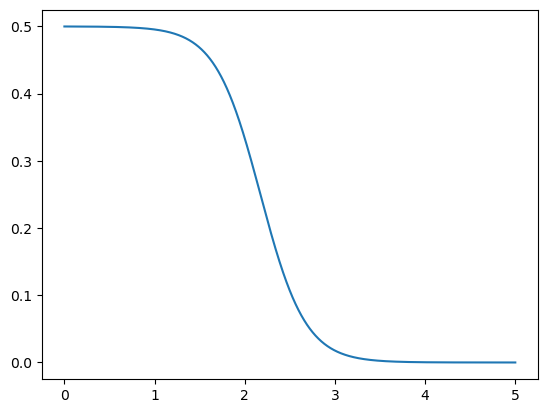

In [6]:
range_P =np.arange(0, 5, 0.001)

D=[]
for p in range_P:
    P =  [p]*game.n
    D.append(game.demand(P,0))


#Test = game.demand(P)
plt.plot(range_P,D)



The parameters $a_i =2$ are product quality indices that capture vertical differentiation, meaning brand differentiation from competitors. We say product 0 is an outside good and $a_0 =0$.

The parameter $\mu$ captures horizontal differentiation, or substitutability between products. In the case of perfect substitutes, $\mu \rightarrow 0$. Therefore, as $\mu \rightarrow 1$, the products become less substitutable or more horizontally differentiated. In our case $\mu =0.25$. 


The parameters $a_i =2$ are product quality indices that capture vertical differentiation, meaning brand differentiation from competitors. We say product 0 is an outside good and $a_0 =0$.

The parameter $\mu$ captures horizontal differentiation, or substitutability between products. In the case of perfect substitutes, $\mu \rightarrow 0$. Therefore, as $\mu \rightarrow 1$, the products become less substitutable or more horizontally differentiated. In our case $\mu =0.25$. 

### Bertrand Nash Equilibrium


Assuming that the firms play a symmetric strategy, the profit or reward to firm $i$ at period $t$ is
$$
\pi_{i, t}= \frac{1}{2}\left(p_{i, t}-c_i\right) q_{i, t},
$$
with $\pi_{i, t}$ representing profit, $\left(p_{i, t}-c_i\right)$ representing profit per unit of product, and $q_{i, t}$ representing demand of product.

We can compute the Nash Equilibrium by maximizing the profit of each firm $i$ with respect to the price $p_{i,t}$, that is 
$$\frac{d}{d p_{i, t}} \pi_{i, t}=\frac{d}{d p_{i, t}}\left(p_{i, t}-c_i\right) q_{i, t}
=\frac{d}{d p_{i, t}}\left(p_{i, t}-c_i\right) \frac{e^{\frac{a_i-p_{i, t}}{\mu}}}{e^{\frac{a_0}{\mu}}+\sum_{j=1}^n e^{\frac{a_j-p_{j, t}}{\mu}}}=0$$
Then, for each $t$ we have a system of $n=2$ FOCs  
$$\frac{e^{\frac{a_i-p_{i, t}}{\mu}}}{e^{\frac{a_0}{\mu}}+\sum_{j=1}^n e^{\frac{a_j-p_{j, t}}{\mu}}}\left(1+\frac{e^{\frac{a_i-p_{i, t}}{\mu}}\left(p_{i, t}-c_i\right)}{\mu\left(e^{\frac{a_0}{\mu}}+\sum_{j=1}^n e^{\frac{a_j-p_{j, t}}{\mu}}\right)}-\frac{p_{i, t}-c_i}{\mu}\right)=0$$

Finding the root simultaneously for all $n$ firms (i.e. finding the root for $\frac{d}{d p_{0, t}} \pi_{0, t}$ and $\frac{d}{d p_{1, t}} \pi_{1, t}$ simultaneously), we can find the $p^N$, or the Nash equilibrium.

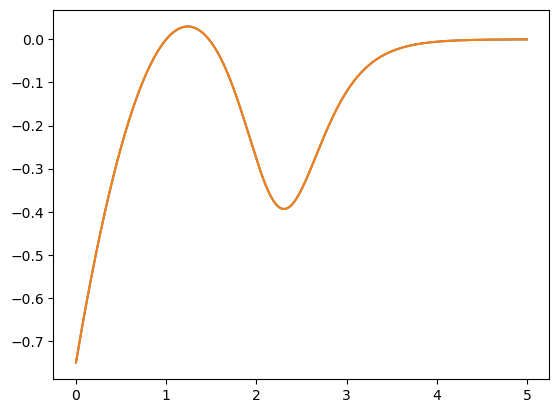

In [6]:
F=[]
for p in range_P:
    F.append(game.foc([p]* game.n))

plt.plot(range_P,F)

In [7]:

nash_sol = optimize.root(game.foc, [2] * game.n) # args is the initial guess: #!CRUCIAL
pN = nash_sol.x[0]
print('Nash Price:', pN)

Nash Price: 1.4729266600306228


In [8]:
game.nash_sol()

1.4729266600306228

In [ ]:
# Finding Nash Price by iteration (TO FIX)
# Make sure this tries all possibilities
nash_temp = 0
for i in range_P:
    p = [i] * game.n
    first_player_profit = (i - game.c) * game.demand(p,0)
    new_profit = []
    for j in range_P:
        p[0] = j
        new_profit.append((j - game.c) * game.demand(p,0))
    if first_player_profit >= np.max(new_profit):
        nash_temp = i
pN = nash_temp
print('Nash Price:', pN)

### Monopoly

To find the monopoly price, we maximize the profit function of a single firm $i$, as
$$
p^M=\max _{p_{i, t}} \pi_{i, t}=\max _{p_{i, t}}\left(\left(p_{i, t}-c_i\right) q_{i, t}\right)
$$

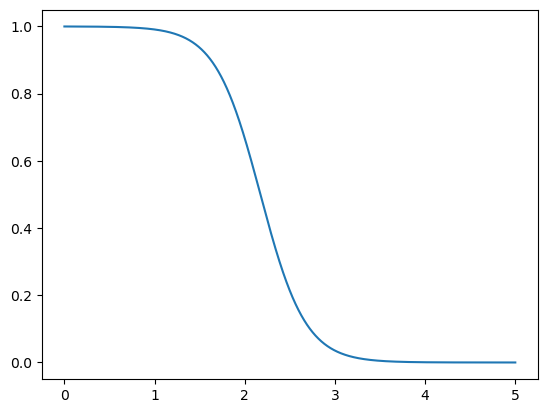

In [9]:
range_P =np.arange(0, 5, 0.001)

DM=[]
for p in range_P:
    P =  [p]*game.n
    DM.append(game.n * game.demand(P,0))

plt.plot(range_P,DM)

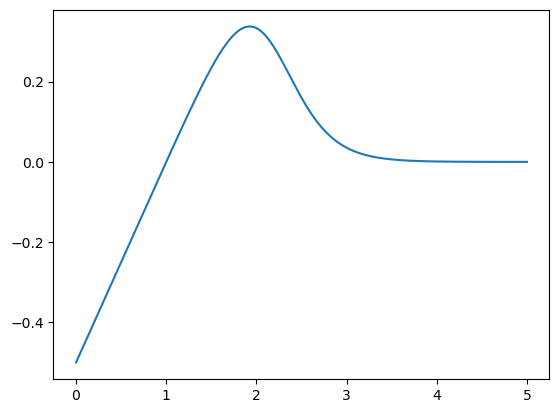

In [8]:
M=[]

for p in range_P:
    P =  [p]*game.n
    M.append(-game.monopoly_func(P))

plt.plot(range_P,M)

In [11]:
#def monopoly_func(p):
#    return -(p[0] - game.c) * game.demand(p,0)

monopoly_sol = optimize.minimize(game.monopoly_func,2) #initial guess not crucial
pM = monopoly_sol.x[0]
print('Monopoly Price:', pM)

Monopoly Price: 1.924980909073859


In [12]:
game.monopoly_sol()

1.924980909073859

In [13]:
# Finding Monopoly Price by iteration
# Make sure this tries all possibilities
price_range = np.arange(0, 2.5, 0.001)
monopoly_profit = []
for i in price_range:
    p = [i] * game.n
    monopoly_profit.append((i - game.c) * game.demand(p,0) * game.n)
pM = price_range[np.argmax(monopoly_profit)]
print('Monopoly Price:', pM)

Monopoly Price: 1.925


### Nash and Monopoly Profit

In [14]:
nash_profit = (pN - game.c) * game.demand([pN, pN],  0)
monopoly_profit = (pM - game.c) * game.demand([pM, pM], 0)

print('Nash Profit:', nash_profit)
print('Monopoly Profit:', monopoly_profit)

Nash Profit: 0.22292666003062275
Monopoly Profit: 0.3374904592431988


1.45 0.2131889931172608 -0.08499776526521662
1.5 0.2341552654167406 0.0980118105657693
1.55 0.2540065036710607 0.2712885209294474
1.6 0.2724923696897623 0.4326472236414674
1.6500000000000001 0.2893264837586128 0.579588178677485
1.7000000000000002 0.30418988383354556 0.7093272426496333
1.7500000000000002 0.3167390986886387 0.8188663373841554
1.8000000000000003 0.32662007093372747 0.9051149806117982
1.8500000000000003 0.3334887474472607 0.9650700149310444
1.9000000000000004 0.33703825177665175 0.9960527891912175
1.9500000000000004 0.3370311261416594 0.9959905912278005


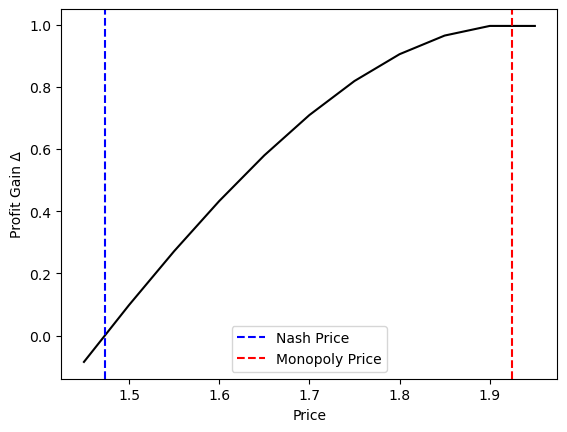

In [15]:
val = []
#x_range = np.linspace(pN-0.05, pM+0.05, 100)
x_range = np.arange(1.45, 2.00, 0.05)

for i in x_range:
    profit = (i - game.c) * game.demand([i, i], 0)
    profit_gain = (profit - nash_profit) / (monopoly_profit - nash_profit)
    val.append(profit_gain)
    print(i, profit, profit_gain)

plt.plot(x_range, val, c='k')
plt.axvline(x=pN, c='b', ls='--', label='Nash Price')
plt.axvline(x=pM, c='r', ls='--', label='Monopoly Price')
plt.xlabel('Price')
plt.ylabel('Profit Gain Δ')
plt.legend()
plt.savefig('profit_gain')

## Q-Learning & SARSA

#### Test 1

In [4]:
trainer.train()

Session: 0, 	Loop Count: 10000, 	 Epsilon: 0.9048464664553819, 	Mean Reward: 0.33631034600164095
Session: 0, 	Loop Count: 20000, 	 Epsilon: 0.8187389404264492, 	Mean Reward: 0.3385415468972231
Session: 0, 	Loop Count: 30000, 	 Epsilon: 0.7408256289009657, 	Mean Reward: 0.3405365888649213
Session: 0, 	Loop Count: 40000, 	 Epsilon: 0.6703267492696158, 	Mean Reward: 0.3416768067805915
Session: 0, 	Loop Count: 50000, 	 Epsilon: 0.6065367250495571, 	Mean Reward: 0.3440990001675522
Session: 0, 	Loop Count: 60000, 	 Epsilon: 0.548817124237828, 	Mean Reward: 0.3481617334439816
Session: 0, 	Loop Count: 70000, 	 Epsilon: 0.4965902696692767, 	Mean Reward: 0.35081629687853677
Session: 0, 	Loop Count: 80000, 	 Epsilon: 0.44933345742932923, 	Mean Reward: 0.3529408569325661
Session: 0, 	Loop Count: 90000, 	 Epsilon: 0.406573725457525, 	Mean Reward: 0.35451317490254797
Session: 0, 	Loop Count: 100000, 	 Epsilon: 0.36788311998424805, 	Mean Reward: 0.35667458095937377
Session: 0, 	Loop Count: 110000, 	 

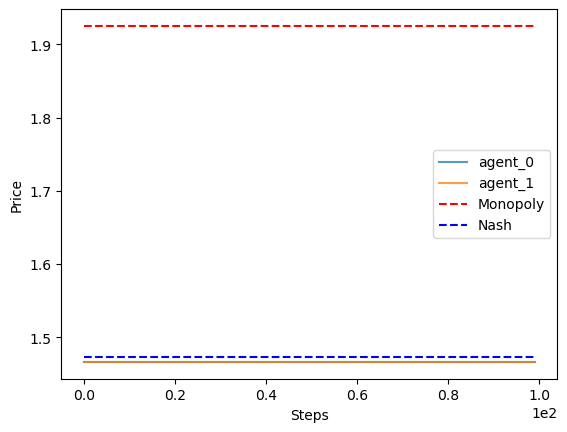

In [6]:
game.plot_last(last_n=100, title_str='_train',overwrite_id=overwrite_id)

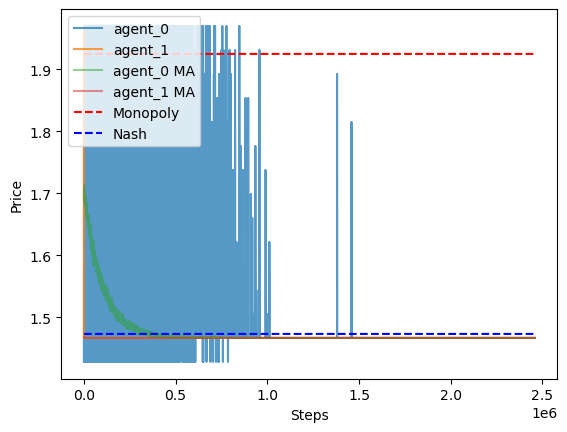

In [7]:
game.plot(overwrite_id=overwrite_id)

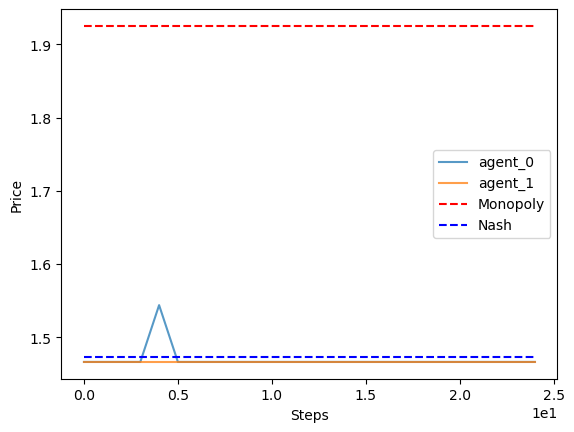

In [8]:
observation = game.deviate(direction='down')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_down_deviation',overwrite_id=overwrite_id)


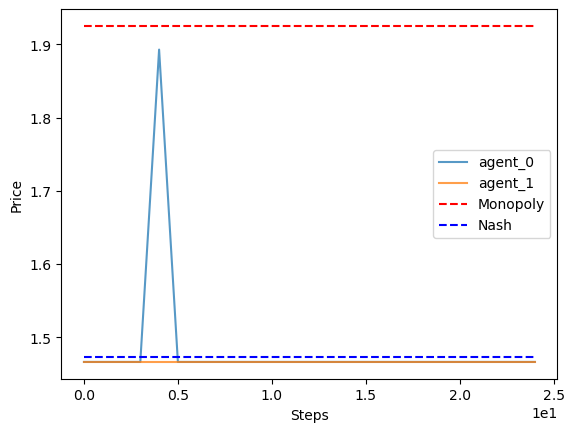

In [9]:
observation = game.deviate(direction='up')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_up_deviation',overwrite_id=overwrite_id)

#### Test 2

In [4]:
trainer.train()

Session: 0, 	Loop Count: 10000, 	 Epsilon: 0.9048464664553819, 	Mean Reward: 0.2807154723966725
Session: 0, 	Loop Count: 20000, 	 Epsilon: 0.8187389404264492, 	Mean Reward: 0.27946924762951203
Session: 0, 	Loop Count: 30000, 	 Epsilon: 0.7408256289009657, 	Mean Reward: 0.2780136349247638
Session: 0, 	Loop Count: 40000, 	 Epsilon: 0.6703267492696158, 	Mean Reward: 0.2783986245777056
Session: 0, 	Loop Count: 50000, 	 Epsilon: 0.6065367250495571, 	Mean Reward: 0.27786446889238464
Session: 0, 	Loop Count: 60000, 	 Epsilon: 0.548817124237828, 	Mean Reward: 0.27758872008225555
Session: 0, 	Loop Count: 70000, 	 Epsilon: 0.4965902696692767, 	Mean Reward: 0.2782481055113397
Session: 0, 	Loop Count: 80000, 	 Epsilon: 0.44933345742932923, 	Mean Reward: 0.27705342444152176
Session: 0, 	Loop Count: 90000, 	 Epsilon: 0.406573725457525, 	Mean Reward: 0.2766731206254758
Session: 0, 	Loop Count: 100000, 	 Epsilon: 0.36788311998424805, 	Mean Reward: 0.2780545735944138
Session: 0, 	Loop Count: 110000, 	 

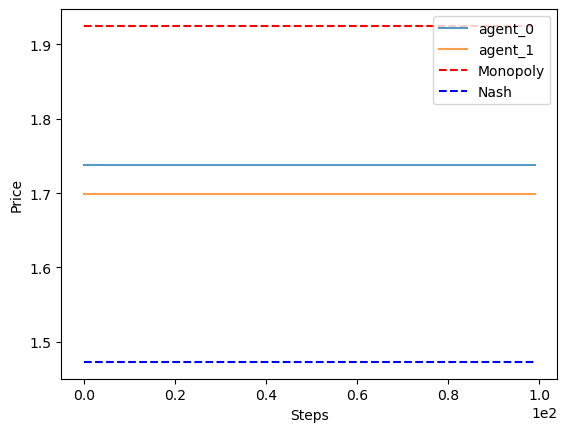

In [5]:
game.plot_last(last_n=100, title_str='_train',overwrite_id=overwrite_id)

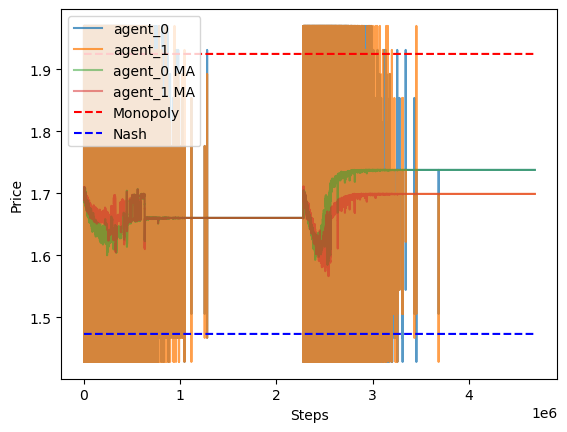

In [6]:
game.plot(overwrite_id=overwrite_id)

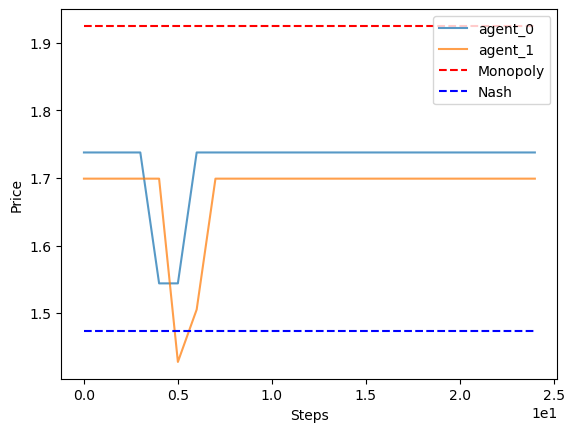

In [7]:
observation = game.deviate(direction='down')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_down_deviation',overwrite_id=overwrite_id)


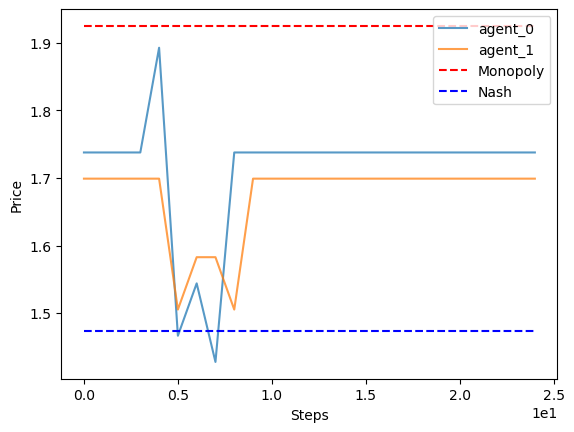

In [8]:
observation = game.deviate(direction='up')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_up_deviation',overwrite_id=overwrite_id)

#### Test 3

In [7]:
trainer.train()

Session: 0, 	Loop Count: 10000, 	 Epsilon: 0.9048464664553819, 	Mean Reward: 0.36645294313885807
Session: 0, 	Loop Count: 20000, 	 Epsilon: 0.8187389404264492, 	Mean Reward: 0.3677862455076739
Session: 0, 	Loop Count: 30000, 	 Epsilon: 0.7408256289009657, 	Mean Reward: 0.3683286352157891
Session: 0, 	Loop Count: 40000, 	 Epsilon: 0.6703267492696158, 	Mean Reward: 0.37052730239347453
Session: 0, 	Loop Count: 50000, 	 Epsilon: 0.6065367250495571, 	Mean Reward: 0.3736363405594696
Session: 0, 	Loop Count: 60000, 	 Epsilon: 0.548817124237828, 	Mean Reward: 0.3775727387390885
Session: 0, 	Loop Count: 70000, 	 Epsilon: 0.4965902696692767, 	Mean Reward: 0.38174613221404763
Session: 0, 	Loop Count: 80000, 	 Epsilon: 0.44933345742932923, 	Mean Reward: 0.38363605460773914
Session: 0, 	Loop Count: 90000, 	 Epsilon: 0.406573725457525, 	Mean Reward: 0.3846267643877939
Session: 0, 	Loop Count: 100000, 	 Epsilon: 0.36788311998424805, 	Mean Reward: 0.3864508940450227
Session: 0, 	Loop Count: 110000, 	 

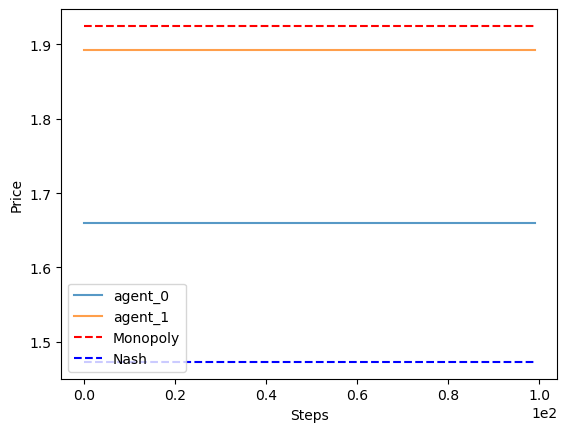

In [8]:
game.plot_last(last_n=100, title_str='_train',overwrite_id=overwrite_id)

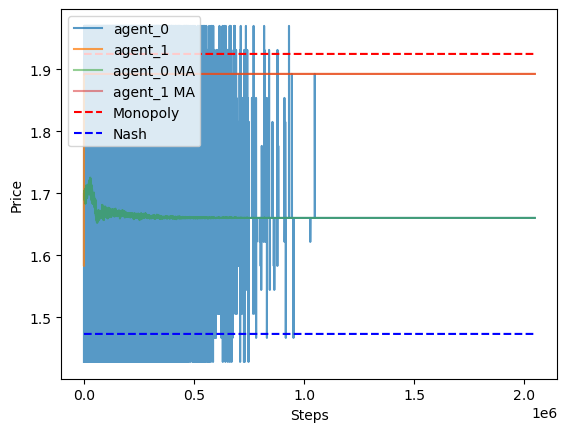

In [9]:
game.plot(overwrite_id=overwrite_id)

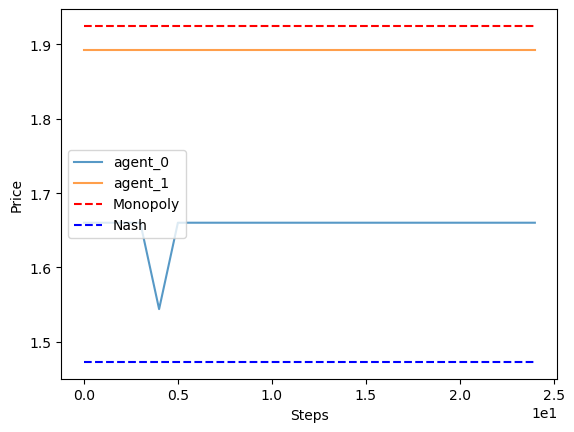

In [10]:
observation = game.deviate(direction='down')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_down_deviation', overwrite_id=overwrite_id)

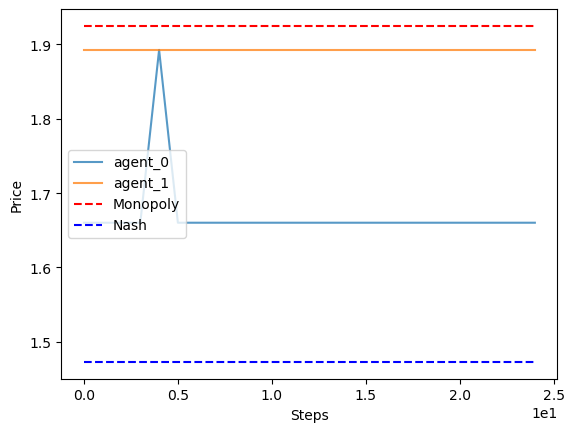

In [11]:
observation = game.deviate(direction='up')
trainer.eval(observation, n=20)
game.plot_last(last_n=25, title_str='_up_deviation',overwrite_id=overwrite_id)

### Final Observations